#Adaptive Linear Neuronal Element (ADALINE) with random hidden layer

This notebook illustrates solving a regression task with for a single input and single output. We first use no hidden layers, so are effectively performing linear regression and so use the standard Ordinary Least Squares (OLS) solver provided by scikit-learn. We then use single hidden layer that consists of random projections followed by adaptive learning. This again can be solved with an OLS solver, but in the transformed (or "latent") representation.  

The architecture with multiple inputs and a single output is shown:

![ADALINE](./imgs/img00054.gif)

We use ordinary least squares to find the optimal set of weights. 

In [1]:
import numpy as np
from matplotlib import pylab
from sklearn import linear_model
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


### Generate synthetic data

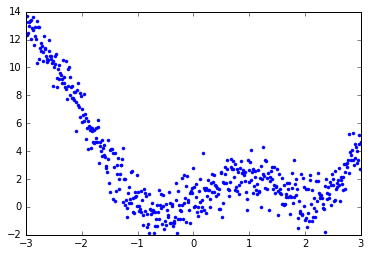

In [2]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig = .3 + -1*x + .9*x**2 + 2*np.sin(2*3.14*.3*x)
## Add white noise
y =  y_orig + np.random.randn(N)
pylab.plot(x, y, '.')

### ADALINE with no hidden layer

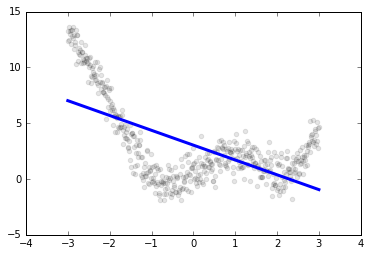

In [3]:
regr = linear_model.LinearRegression()
regr.fit(x[np.newaxis].T, y[np.newaxis].T)
pylab.scatter(x, y, color = 'black', alpha= .1)
pylab.plot(x[np.newaxis].T, regr.predict(x[np.newaxis].T), color = 'blue', linewidth=3)

### ADALINE with randomly projected hidden layer

In this case we transform the input into a latent space by using random basis functions followed by a non-linearity. Once the input is transformed the latent representation, we apply OLS.

$\textbf{z} = \tanh(\textbf{W}_{0}\textbf{x})$

$y = \textbf{W}_{1}\textbf{z}$ (with bias term included)

where the elements of $\textbf{W}_{0} \in \mathbf{R}^{M\times n}$ are drawn IID from $\sim N(0, \sigma)$ and scaled (or "regularized") by $\frac{1}{M}$ (motivated by Xaviar initialization as discussed [here](https://crude2refined.wordpress.com/2016/08/09/what-is-an-intuitive-explanation-of-the-xavier-initialization-for-deep-neural-networks/)). $M$ corresponds to the number of hidden neurons or units. $\textbf{W}_{1} \in \mathbf{R}^{1\times (M+1)}$ then is found using an OLS solver. $M$ Rosenblatt's original archtectural design for this for images is shown below:

![ADALINE](./imgs/img00038.gif)
From http://neuron.eng.wayne.edu/tarek/MITbook/chap6/6_2.html

In [4]:
# build design matrix to append bias (1's)
X = np.hstack((x[np.newaxis].T, np.ones((N,1))))
X[:5,:]

array([[-3.        ,  1.        ],
       [-2.98797595,  1.        ],
       [-2.9759519 ,  1.        ],
       [-2.96392786,  1.        ],
       [-2.95190381,  1.        ]])

In [5]:
M = 10 # number of hidden nodes
## setup random weights to project data
weights = 1./M*np.random.randn(M,2)
weights.shape

(10, 2)

In [6]:
Z = np.tanh(np.dot(X,weights.T))
Z.shape

(500, 10)

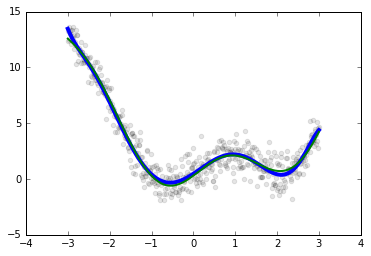

In [7]:
regr = linear_model.LinearRegression()
regr.fit(Z, y[np.newaxis].T)
pylab.scatter(x, y, color = 'black', alpha= .1)
pylab.plot(x[np.newaxis].T, regr.predict(Z), color = 'blue', linewidth=4)
pylab.plot(x, y_orig, color = 'green', linewidth = 2)